In [1]:
from patsy import *
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

In [2]:
df1 = pd.DataFrame(["A", "A", "B", "B"], columns=["x1"])
df1

,x1
0,A
1,A
2,B
3,B


In [3]:
dmatrix("x1 + 0", df1)

DesignMatrix with shape (4, 2)
  x1[A]  x1[B]
      1      0
      1      0
      0      1
      0      1
  Terms:
    'x1' (columns 0:2)

In [5]:
df2 = pd.DataFrame([1, 2, 3, 4], columns=["x1"])
df2

,x1
0,1
1,2
2,3
3,4


In [6]:
dmatrix("C(x1) - 1", df2)

DesignMatrix with shape (4, 4)
  C(x1)[1]  C(x1)[2]  C(x1)[3]  C(x1)[4]
         1         0         0         0
         0         1         0         0
         0         0         1         0
         0         0         0         1
  Terms:
    'C(x1)' (columns 0:4)

In [7]:
df3 = pd.DataFrame(["A", "B", "C"], columns=["x1"])
df3

,x1
0,A
1,B
2,C


In [8]:
dmatrix("x1", df3)

DesignMatrix with shape (3, 3)
  Intercept  x1[T.B]  x1[T.C]
          1        0        0
          1        1        0
          1        0        1
  Terms:
    'Intercept' (column 0)
    'x1' (columns 1:3)

In [9]:
dmatrix("C(x1, Treatment('B'))", df3)

DesignMatrix with shape (3, 3)
  Intercept  C(x1, Treatment('B'))[T.A]  C(x1, Treatment('B'))[T.C]
          1                           1                           0
          1                           0                           0
          1                           0                           1
  Terms:
    'Intercept' (column 0)
    "C(x1, Treatment('B'))" (columns 1:3)

In [10]:
df_nottem = sm.datasets.get_rdataset("nottem").data

In [11]:
import datetime
from calendar import isleap

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date


df_nottem["date0"] = df_nottem[["time"]].applymap(convert_partial_year)
df_nottem["date"] = pd.DatetimeIndex(df_nottem["date0"]).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem["month"] = df_nottem["date"].dt.strftime("%m").astype('category')
del df_nottem["date0"], df_nottem["date"]
df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


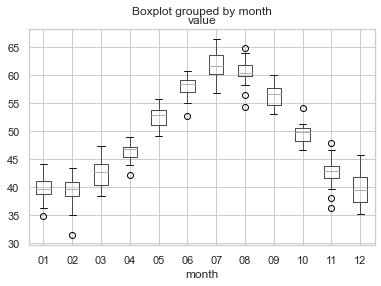

In [12]:
df_nottem.boxplot("value", "month")
plt.show()

In [21]:
model = sm.OLS.from_formula("value ~ C(month, Treatment('01'))", df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Fri, 07 Aug 2020   Prob (F-statistic):          2.96e-125
Time:                        15:44:50   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### 상호작용항

In [23]:
df6 = pd.DataFrame([["A", 1], ["B", 2], ["A", 4], ["B", 5]], columns=["x1", "x2"])
df6

,x1,x2
0,A,1
1,B,2
2,A,4
3,B,5


In [24]:
dmatrix("C(x1):x2", df6)

DesignMatrix with shape (4, 3)
  Intercept  C(x1)[A]:x2  C(x1)[B]:x2
          1            1            0
          1            0            2
          1            4            0
          1            0            5
  Terms:
    'Intercept' (column 0)
    'C(x1):x2' (columns 1:3)

In [25]:
dmatrix("C(x1) + C(x1):x2", df6)

DesignMatrix with shape (4, 4)
  Intercept  C(x1)[T.B]  C(x1)[A]:x2  C(x1)[B]:x2
          1           0            1            0
          1           1            0            2
          1           0            4            0
          1           1            0            5
  Terms:
    'Intercept' (column 0)
    'C(x1)' (column 1)
    'C(x1):x2' (columns 2:4)

### 범주형 독립변수의 상호작용

In [27]:
df5 = pd.DataFrame([["A", "X"], ["B", "X"], ["A", "Y"], ["B", "Y"]], columns=["x1", "x2"])
df5

,x1,x2
0,A,X
1,B,X
2,A,Y
3,B,Y


In [28]:
dmatrix("x1:x2 + 0", df5)

DesignMatrix with shape (4, 4)
  x1[A]:x2[X]  x1[B]:x2[X]  x1[A]:x2[Y]  x1[B]:x2[Y]
            1            0            0            0
            0            1            0            0
            0            0            1            0
            0            0            0            1
  Terms:
    'x1:x2' (columns 0:4)

In [29]:
dmatrix("x1:x2", df5)

DesignMatrix with shape (4, 4)
  Intercept  x2[T.Y]  x1[T.B]:x2[X]  x1[T.B]:x2[Y]
          1        0              0              0
          1        0              1              0
          1        1              0              0
          1        1              0              1
  Terms:
    'Intercept' (column 0)
    'x1:x2' (columns 1:4)